<a href="https://colab.research.google.com/github/anirudhkowluri/sentiment-analysis-using-nlp/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np       #linear algebra
import pandas as pd      #data processing ,csv file I/o
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
#Exploratory data analysis
#read the data
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Sentiment analysis for restaurants reviews/Restaurant_Reviews.xlsx')

In [7]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
df.shape

(1000, 2)

In [11]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [12]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [13]:
#Datapreprocessing using NLP
#import the nlp libraries
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
#preprocessing of reviews

corpus = []
for i in range(0,1000):

  #1000 records
  #cleaning special character from the reviews
  #the re.sub() method performs global search and global replace on the given data
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(df['Review'][i]))

    #convering the entire review into lowercase
    review = review.lower()

    #Tokenizing the review by words
    review_words = review.split()

    #removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]    #stopwords are the english wordswhich doesn't add much meaning to a sentence

      #streaming the stop words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    #joining the stemmed words
    review = ' '.join(review)

   #creating a corpus
    corpus.append(review)

In [15]:
corpus[0:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [16]:
#creating the bags of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)  #max_features = 1500
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values #used for locating integer values

In [17]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

#random_state simply sets seed to the random generator, so that your train-test splits are always deterministic. if you dont set seed, it is difficult to each time

#Training (1000,1500)
#1000 * 80/100 = 800
#1000 * 20/100 = 200


In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [20]:
#training the model
#Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
# the multinomial Naive Bayes classifier is suitable for classification with discrete features(e.g., word counts for text classification).

classifier = MultinomialNB()
classifier.fit(X_train,y_train)  #fit training data


MultinomialNB()

In [21]:
y_pred = classifier.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [51]:
#Accuracy,Prediction and f1-score
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.67      0.78      0.72        97
           1       0.76      0.64      0.69       103

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



In [55]:
score3 = accuracy_score(y_test,y_pred)
print("Accuracy score is : {}%".format(round(score3*100,2)))

-------scores--------
Accuracy score is : 71.0%
precision_score is : 75.86%
recall_score is : 64.08%


In [22]:
#using svc model
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)



SVC()

In [27]:
z_pred = classifier.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [28]:
#Accuracy,Prediction and Recall

from sklearn.metrics import accuracy_score
#in python, the accuracy_score function of the sklearn. metrics package calculates the accuracy the accuracy score for a set of predicted labels against the true labels.

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,z_pred)
score2 = precision_score(y_test,z_pred)
score3 = recall_score(y_test,z_pred)

print("-------scores--------")
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("precision_score is : {}%".format(round(score2*100,2)))
print("recall_score is : {}%".format(round(score3*100,2)))


-------scores--------
Accuracy score is : 73.5%
precision_score is : 89.06%
recall_score is : 55.34%


In [29]:
#using Gaussion naive bayes model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [30]:
h_pred = classifier.predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [50]:
#Accuracy,Prediction and f1-score
from sklearn import metrics
print(metrics.classification_report(y_test,h_pred))



              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



In [49]:
score2 = accuracy_score(y_test,h_pred)
print("Accuracy score is : {}%".format(round(score2*100,2)))

Accuracy score is : 73.0%


In [32]:
#using logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)


LogisticRegression()

In [36]:
f_pred = classifier.predict(X_test)

In [39]:
#Accuracy,Prediction and f1-score
from sklearn import metrics
print(metrics.classification_report(y_test,f_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        97
           1       0.76      0.64      0.69       103

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



In [54]:
score1 = accuracy_score(y_test,f_pred)
print("Accuracy score is : {}%".format(round(score1*100,2)))

Accuracy score is : 71.0%


In [ ]:
#ALL MODEL ACCURACY RATES
#MultinomialNB=71.0%
#SVC=73.5%
#GaussianNB=73%
#LogisticRegression=71.0%
#SO SVC IS BEST MODEL FOR SENTIMENT ANALYSIS


In [57]:
#making the confusion matrix
#A confusion matrix is table that is used to define the performance of a classification algorithm.
#A confusion matrix visualizes and summarizes the performance of a classification

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,z_pred)

In [59]:
print(cm)

[[90  7]
 [46 57]]


Text(95.72222222222221, 0.5, 'Actual values')

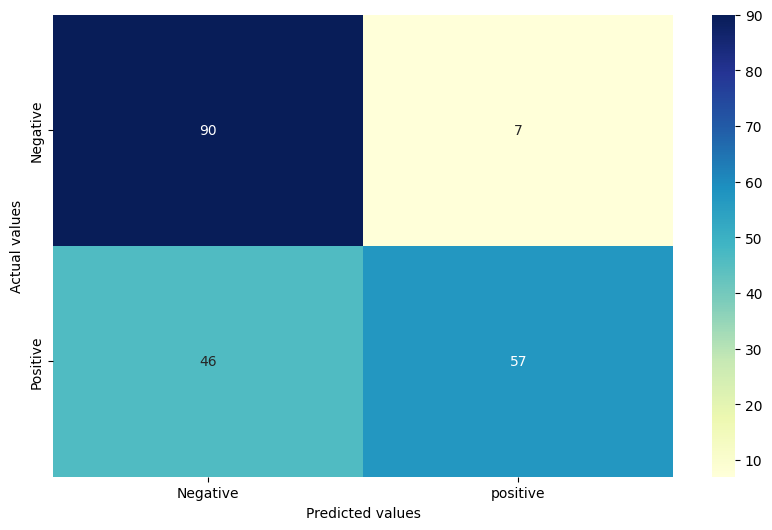

In [58]:
#plotting the confusion matrix

import matplotlib.pyplot as plt   #matplotlib is a low level graph plotting library in python that servs as a visualization utility
import seaborn as sns    #seaborn is python data visualization library based on matplotlib
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=["Negative","positive"],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [67]:
#model prediction and evalution
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern = '[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review =sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps=PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [66]:
#Predicted values
sample_review = 'The food is very very good'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')


This is a POSITIVE review


In [63]:
#Predicted values
sample_review = 'The food is very very good'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')


This is a POSITIVE review


In [62]:
#Predicted values
sample_review = 'The food was absolutely wonderful, from preparation to presentation,very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is a POSITIVE review


In [68]:
#Predicted values
sample_review = 'Not tasty and the texture was just nasty.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is Negative review!


In [69]:
#Predicted values
sample_review = 'I was disgusted because I was pretty sure that was human hair.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is Negative review!')

This is Negative review!
